In [91]:
import numpy as np
import math
from scipy.stats import multivariate_normal
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5)

mu1 = np.asarray([1,0])
mu2 = np.asarray([-1,0])
mu3 = np.asarray([0,-10])
U = np.asarray([[1/math.sqrt(2),-1/math.sqrt(2)],[1/math.sqrt(2),1/math.sqrt(2)]])
Lambda1 = np.asarray([[4,0],[0,1]])
Lambda2 = np.asarray([[1,0],[0,5]])                     
Sigma1 = U.dot(Lambda1).dot(U.transpose())
Sigma2 = U.dot(Lambda2).dot(U.transpose())
Sigma3 = np.identity(2)
               

#rv = multivariate_normal(mu1, Sigma1)
X1 = np.random.multivariate_normal(mu1, Sigma1, 1000)
X2 = np.random.multivariate_normal(mu2,Sigma2,1000)
X3 = np.random.multivariate_normal(mu3,Sigma3,1000)


print(X.shape)

(1000, 2)


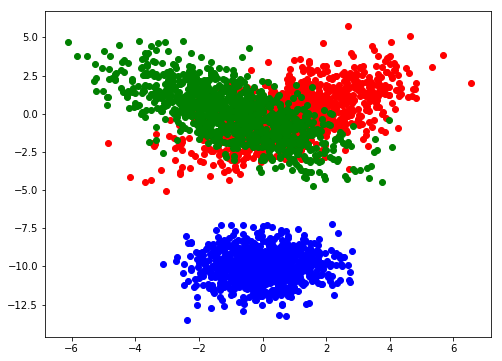

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt


#x,y = zip(*X1)
fig1 = plt.figure(figsize=(8,6))

ax = fig1.add_subplot(111)
ax.scatter(X1[:,0],X1[:,1],c='r',marker='o')
ax.scatter(X2[:,0],X2[:,1],c='g',marker='o')
ax.scatter(X3[:,0],X3[:,1],c='b',marker='o')

plt.show()

(3000, 2)
(3,)


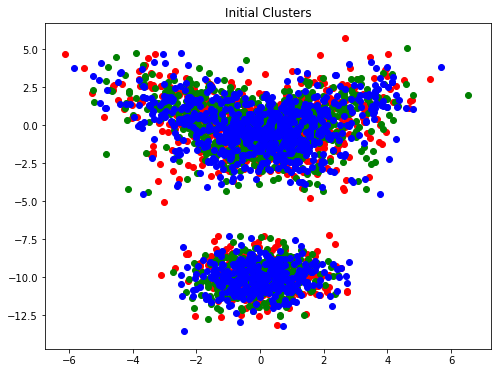

In [122]:
import numpy.linalg as la
K = 3
Data = np.vstack((X1,X2,X3))
print(Data.shape)
np.random.shuffle(Data)
clusters = [[],[],[]]
for i in range(len(Data)):
    kind = np.random.randint(3)
    clusters[kind].append(Data[i])
for i in range(K):
    clusters[i] = np.asarray(clusters[i])
clusters = np.asarray(clusters)
print(clusters.shape)

%matplotlib inline
import matplotlib.pyplot as plt


#x,y = zip(*X1)
fig1 = plt.figure(figsize=(8,6))

ax = fig1.add_subplot(111)
ax.scatter(clusters[0][:,0],clusters[0][:,1],c='r',marker='o')
ax.scatter(clusters[1][:,0],clusters[1][:,1],c='g',marker='o')
ax.scatter(clusters[2][:,0],clusters[2][:,1],c='b',marker='o')
plt.title("Initial Clusters")

plt.show()

changed = 1
centroids = np.zeros((K,2))
while(changed!=0):
    c1 = []
    c2 = []
    c3 = []
    C = [c1,c2,c3]
    #print (centroids)
    for k in range(K):
        centroids[k] = np.mean(clusters[k],axis=0)
        
    changed = 0
    
    for k in range(K):
                
        for i in range(len(clusters[k])):
            xi = clusters[k][i]
            dist = np.zeros(K)
            for j in range(K):
                dist[j] = la.norm(xi-centroids[j])
            #print(dist)
            index = np.argmin(dist)
            if index!=k:
                changed =1
                #print(clusters[index].shape)
                #print(xi.shape)
                C[index].append(xi)
            else:
                C[k].append(xi)
    for k in range(K):
        clusters[k]=np.asarray(C[k])
                #np.append(clusters[index],xi.reshape(1,2),axis=0)
                #np.delete(clusters[k],i,0)
                        

In [123]:
C1 = clusters[0]
C2 = clusters[1]
C3 = clusters[2]
print(C1.shape,C2.shape,C3.shape)

(1086, 2) (914, 2) (1000, 2)


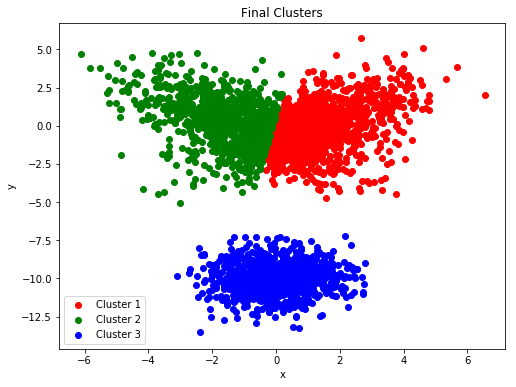

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(8,6))

ax = fig1.add_subplot(111)
if (len(C1)>0):
    c1 = ax.scatter(C1[:,0],C1[:,1],c='r',marker='o')
if (len(C2)>0):
    c2 = ax.scatter(C2[:,0],C2[:,1],c='g',marker='o')
if (len(C3)>0):
    c3 = ax.scatter(C3[:,0],C3[:,1],c='b',marker='o')
ax.set_title("Final Clusters")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend([c1,c2,c3], ["Cluster 1","Cluster 2","Cluster 3"],loc=3)
plt.show()